In [1]:
## Importing necassary libraries
import numpy as np
import scipy.signal as ss

def pli_connectivity(sensors,data):
    """
    Computing PLI connectivity
    
    Parameters
    ----------
    sensors : INT (means channels)
        DESCRIPTION. No of sensors used for capturing EEG
    data : Array of float 
        DESCRIPTION. EEG Data

    Returns
    -------
    connectivity_matrix : Matrix of float
        DESCRIPTION. PLI connectivity matrix
    connectivity_vector : Vector of flaot 
        DESCRIPTION. PLI connectivity vector

    """
    print("PLI in process.....")
    # Predefining connectivity matrix
    connectivity_matrix = np.zeros([sensors,sensors],dtype=float)
    
    # Computing hilbert transform
    data_points = data.shape[-1]
    data_hilbert = np.imag(ss.hilbert(data))
    phase = np.arctan(data_hilbert/data)
    
    # Computing connectivity matrix
    for i in range(sensors):
        for k in range(sensors):
            connectivity_matrix[i,k] = np.abs(np.sum(np.sign(phase[i,:]-phase[k,:])))/data_points
    
    # Computing connectivity vector
    connectivity_vector = connectivity_matrix[np.triu_indices(connectivity_matrix.shape[0],k=1)] 
    
    # returning connectivity matrix and vector
    print("PLI done!")
    return connectivity_matrix, connectivity_vector

def coh_connectivity(sensors,data,f_min,f_max,fs):
    """
    Computing Coherence
    
    Parameters
    ----------
    sensors : INT
        DESCRIPTION. No of sensors used for capturing EEG
    data : Array of float 
        DESCRIPTION. EEG Data
    f_min : float
        DESCRIPTION. Low pass frequency of band pass filter given in hertz
    f_max : TYPE: float
        DESCRIPTION. High pass frequency of band pass filter given in hertz
    fs : TYPE: float
        DESCRIPTION. Sampling frequency of data given in hertz
    
    Returns
    -------
    connectivity_matrix : Matrix of float
        DESCRIPTION. COH connectivity matrix
    connectivity_vector : Vector of float 
        DESCRIPTION. COH connectivity vector

    """
    print("COH in process.....")
    
    # Predefinig connectivity matrix
    connectivity_matrix = np.zeros([sensors,sensors],dtype=float)
    
    # Computing coherence 
    for i in range(sensors):
        for k in range(sensors):
            f, Cxy = ss.coherence(data[i,:],data[k,:],fs = fs)
            connectivity_matrix[i,k] = np.mean(Cxy[np.where((f>=f_min) & (f<=f_max))])
    
    # Computing connectivity vector
    connectivity_vector = connectivity_matrix[np.triu_indices(connectivity_matrix.shape[0],k=1)] 
    
    # returning connectivity matrix and/or vector
    print("COH done!")
    return connectivity_matrix, connectivity_vector

In [2]:
data = np.random.rand(30,1500)

In [3]:
coh_matrix, coh_vector = coh_connectivity(30,data,2,4,500)
print('\ncoh_matrix:\n',coh_matrix)
print('\ncoh_vector:\n',coh_vector)
pli_matrix, pli_vector = pli_connectivity(30,data)
print('\npli_matrix:\n',pli_matrix)
print('\npli_vector:\n',pli_vector)

COH in process.....
COH done!

coh_matrix:
 [[1.00000000e+00 1.28319158e-01 3.35576241e-02 1.20142981e-01
  8.54820184e-02 4.75231729e-02 9.51062328e-02 2.29096725e-02
  1.06007808e-01 4.60416322e-02 1.23021110e-02 1.07620683e-01
  1.36888684e-01 5.94981920e-02 1.08139573e-01 4.54111336e-01
  5.32282295e-02 2.71841830e-03 5.08495699e-02 3.77930939e-02
  1.83897056e-01 1.13581868e-01 9.35612047e-02 1.06669024e-01
  9.81325285e-02 2.55104958e-02 2.21369591e-02 3.02126196e-02
  1.28472344e-01 2.25474384e-02]
 [1.28319158e-01 1.00000000e+00 3.96369248e-02 2.64953659e-02
  2.34076706e-01 1.29470423e-01 2.63529915e-03 2.49365110e-01
  3.31352650e-01 3.92133039e-02 3.60674703e-01 7.62234442e-02
  1.88503504e-01 1.09666751e-01 4.82923699e-02 2.03858125e-01
  1.53523478e-01 3.54467863e-03 4.94786146e-03 3.65461268e-01
  1.21523100e-01 1.48491465e-01 3.42984462e-02 2.81349965e-04
  3.01639190e-01 1.62633887e-02 5.16641427e-02 1.88354103e-01
  8.59115283e-02 3.11889458e-03]
 [3.35576241e-02 3.963

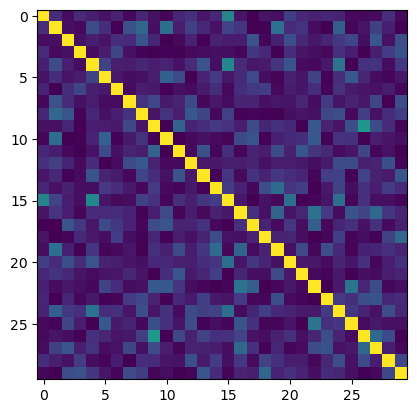

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(coh_matrix)